In [2]:
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
from astropy.table import Table

In [ ]:
#Read in data
data = Table.read("data/nihao_uhd_simulation_g8.26e11_xyz_positions_and_oxygen_ao.fits")
display(data.to_pandas().head())

,x,y,z,A_O
0,10.020546,-15.421509,-3.241711,8.428943
1,-13.487837,5.663507,-0.802306,8.671107
2,6.642289,-0.138942,-0.585961,8.891596
3,0.203939,4.112373,-0.147622,8.977195
4,-20.824045,6.971037,-1.758061,8.326950


In [12]:
# Create radius column
data["r"] = np.sqrt(data["x"]**2 + data["y"]**2 + data["z"]**2)

In [ ]:
#Perform linear fit
fit = linregress(data["A_O"], data["r"])
print(fit)

LinregressResult(slope=-26.251949123656384, intercept=241.3024536278179, rvalue=-0.9342828752574595, pvalue=0.0, stderr=0.014007220821521582, intercept_stderr=0.12114494778829156)


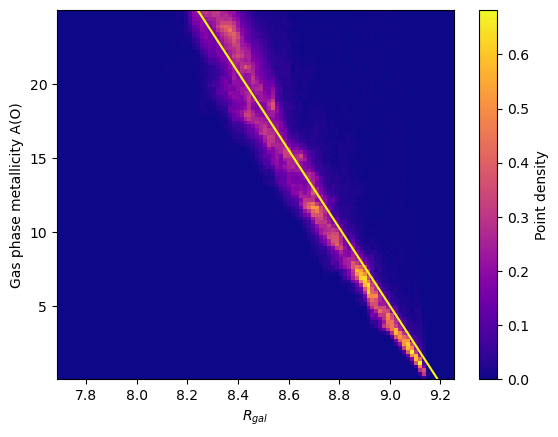

In [ ]:
xaxis = np.linspace(7.8, 9.2, 100) #From the edges of the histogram
fig,ax = plt.subplots()

hist, x, y, mesh = ax.hist2d(data["A_O"], data["r"], bins=100, density=True, cmap="plasma")

ax.plot(xaxis, fit.slope*xaxis+fit.intercept, color="yellow")
# ax.scatter(data["A_O"], data["r"], marker=".")
plt.colorbar(mesh, ax=ax, label="Point density")
ax.set_xlabel("$R_{gal}$")
ax.set_ylabel("Gas phase metallicity A(O)")
plt.show()